In [6]:
# Importation of the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import datasets
from sklearn.model_selection import train_test_splitx
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [7]:
# Impor
raw= pd.read_csv('Algerian_forest_fires_df.csv')
df= pd.read_csv('Algerian_forest_fires_df.csv',header=[1])

In [8]:
# 1 : "Bejaia Region Dataset"
# 0 : "Sidi-Bel Abbes Region Dataset"
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2.0
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2.0
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2.0
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2.0


In [9]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [10]:
df = df.drop(122)
df = df.drop(123)

In [11]:
df= df.reset_index(drop=True)
df[121:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1.0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2.0
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2.0
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2.0
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2.0
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2.0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2.0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2.0


In [12]:
#df = df.rename(columns={' RH': 'RH', ' Ws': 'Ws','Rain ': 'Rain'})
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [13]:
print("The dataset shape: ",df.shape)

The dataset shape:  (244, 15)


In [14]:
print("Type of the dataset: ",type(df))

Type of the dataset:  <class 'pandas.core.frame.DataFrame'>


In [15]:
print("The number of dimensions: ",df.ndim)

The number of dimensions:  2


In [16]:
df.loc[165]

day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region             2.0
Name: 165, dtype: object

In [17]:
shift = df.iloc[165]['DC'].split(' ')
df.loc[165,'DC']=shift[0]
permutation = df.loc[165,'ISI']
df.loc[165,'ISI'] = shift[1]
permutation2 = df.loc[165,'BUI']
df.loc[165,'BUI'] = permutation
permutation3 = df.loc[165,'FWI']
df.loc[165,'FWI']= permutation2

df.loc[165,'Classes']= permutation3

df[['day','month','year','Temperature','RH','Ws','Region']] = df[['day','month','year','Temperature','RH','Ws','Region']].astype(int)
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

# it is more memory efficient to use shorter integer/float numbers when handling a large dataset. 

In [18]:
df.loc[165]

day                 14
month                7
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC                14.6
ISI                9.0
BUI               12.5
FWI               10.4
Classes        fire   
Region               2
Name: 165, dtype: object

In [19]:
print("The attribute types: ")
print(df.dtypes)

The attribute types: 
day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object


In [20]:
print(df.head(5))

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          1  
1  0.4  not fire          1  
2  0.1  not fire          1  
3  0.0  not fire          1  
4  0.5  not fire          1  


In [21]:
print(df.tail())

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
239   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
240   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
241   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
242   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
243   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI       Classes  Region  
239  6.5       fire          2  
240  0.0   not fire          2  
241  0.2   not fire          2  
242  0.7   not fire          2  
243  0.5  not fire           2  


In [22]:
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            173
FWI            126
Classes          8
Region           2
dtype: int64

In [23]:
df['month'].unique()

array([6, 7, 8, 9])

In [24]:
df['year'].unique()

array([2012])

In [25]:
df.to_csv('Algerian_forest_fires_df_cleaned.csv')

In [63]:
def plot_boxplot(df, ft):
    df.boxplot(column=ft)
    plt.grid(False)
    plt.show()

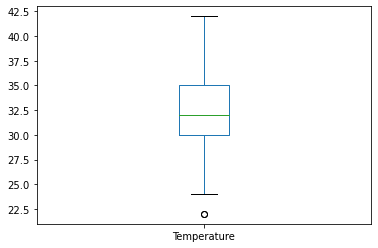

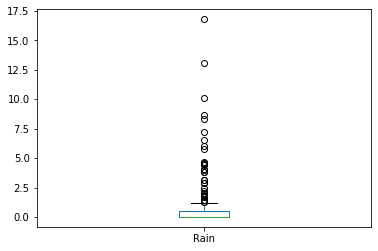

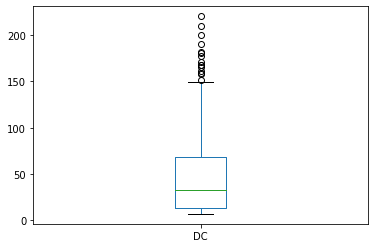

In [65]:
plot_boxplot(df,["Temperature"])
plot_boxplot(df,["Rain"])
plot_boxplot(df,["DC"])

In [ ]:
#profile = ProfileReport(df, title="Pandas Profiling Report")
'''
Get Rid of Extra Spaces.
Select and Treat All Blank Cells.
Convert Numbers Stored as Text into Numbers.
Remove Duplicates.
Highlight Errors.
Change Text to Lower/Upper/Proper Case.
Spell Check.
Delete all Formatting.
https://www.dummies.com/programming/big-data/data-science/8-best-practices-in-data-preparation/
'''
